In [19]:
import requests
import json

periods = 60
url = f'https://api.cryptowat.ch/markets/bitmex/btcusd-perpetual-futures/ohlc?after=1&periods={periods}';

try:
    res = json.loads(requests.get(url).text)['result'][f'{periods}']
    print(res)
except Exception as e:
    print(e)

[[1520504220, 9978, 9984, 9970, 9982.5, 3252858, 32451820000], [1520504280, 9982, 10007, 9982, 10005.5, 4336579, 43344196000], [1520504340, 10005.5, 10010, 9991, 9991, 2782837, 27833362000], [1520504400, 9991, 9991.5, 9977, 9977, 3506964, 35010050000], [1520504460, 9977.5, 9990.5, 9969.5, 9990, 3497458, 34883535000], [1520504520, 9990.5, 9999, 9984, 9998, 3040788, 30381558000], [1520504580, 9997.5, 10008.5, 9997.5, 10006, 2442068, 24421294000], [1520504640, 10006, 10006.5, 9990, 9995.5, 2811685, 28116759000], [1520504700, 9996.5, 10005.5, 9995.5, 10005, 567050, 5672261000], [1520504760, 10005, 10005.5, 10002, 10002, 545011, 5452833000], [1520504820, 10001, 10001, 9994, 10000, 598645, 5984851000], [1520504880, 10000, 10015, 10000, 10014.5, 3286338, 32897378000], [1520504940, 10014.5, 10014.5, 10000.5, 10000.5, 2237147, 22386823000], [1520505000, 10001, 10001, 9995, 9995.5, 1113827, 11136715000], [1520505060, 9995, 9995.5, 9983, 9983.5, 2933299, 29290885000], [1520505120, 9983.5, 9995, 9

In [40]:
import pandas as pd

labels = ['unixtime', 'open', 'high', 'low', 'close', '_', '_']
df = pd.DataFrame.from_records(res, columns=labels).set_index('unixtime')
df.drop(['open', 'high', 'low', '_'], inplace=True, axis=1)
df.head(3)

,close
unixtime,
1520504220,9982.5
1520504280,10005.5
1520504340,9991.0


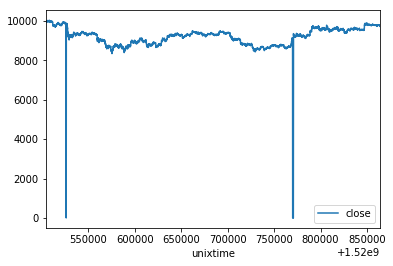

In [42]:
%matplotlib inline
df.plot()

In [56]:
# 正常にデータ取得できなかったと思われる値 0 を直前の値で埋める
# 最初のデータが 0 のときは上手く動かない
previous_close = 0
for index, row in df.iterrows():
    if (row['close'] == 0):
        df.at[index, 'close'] = previous_close
    else:
        previous_close = row['close']

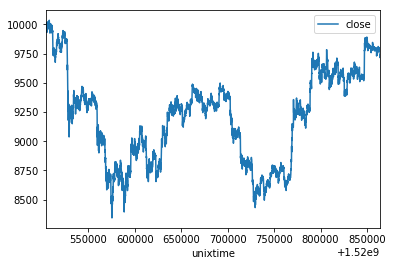

In [57]:
df.plot()

In [58]:
# count = 6000 なので 6000/60/24 = 4.2 日分のデータを学習に使える
df.describe()

,close
count,6000.000000
mean,9216.583500
std,388.965279
min,8343.000000
25%,8829.375000
50%,9279.500000
75%,9522.625000
max,10036.000000
